In [2]:
import pandas as pd

import numpy as np



In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
edad = [10,11,12,13,14,15,16]
altura = [146,154,163,174,182,186,191]

datos = pd.DataFrame({'edad':edad,'altura':altura})

In [7]:
datos.head(7)

,edad,altura
0,10,146
1,11,154
2,12,163
3,13,174
4,14,182
5,15,186
6,16,191


Text(0.5, 1.0, 'Altura del profesor feisar durante la adolecencia')

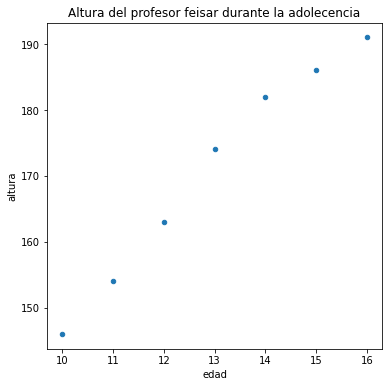

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

datos.plot(
    x = 'edad',
    y = 'altura',
    kind = "scatter",
    ax = ax
)

ax.set_title('Altura del profesor feisar durante la adolecencia')

In [12]:
corr_test = pearsonr(x = datos['edad'], y = datos['altura'])
print("Coeficiente de correlacion de Pearson: ", corr_test[0])
print("P-Value: ", corr_test[1])

Coeficiente de correlacion de Pearson:  0.9896829707146988
P-Value:  2.0650754621263603e-05


In [16]:
X = datos[['edad']]
y = datos['altura']

X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

In [21]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00180
Time:                        12:03:11   Log-Likelihood:                -11.811
No. Observations:                   5   AIC:                             27.62
Df Residuals:                       3   BIC:                             26.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.1321      9.905      7.282      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [22]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,194.094340,2.277216,186.847222,201.341457,181.293378,206.895301
1,148.358491,2.986541,138.853985,157.862996,134.157098,162.559883
2,178.849057,1.510534,174.041863,183.656251,167.253669,190.444445
3,186.471698,1.793082,180.765312,192.178084,174.475584,198.467812


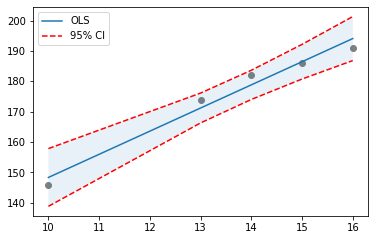

In [24]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();